11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - loss: 0.1814 - val_loss: 0.0733
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0727 - val_loss: 0.0691
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0694 - val_loss: 0.0675
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0680 - val_loss: 0.0666
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0671 - val_loss: 0.0679
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0664 - val_loss: 0.0656
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0660 - val_loss: 0.0651
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0656 - val_loss: 0.0652
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0651 - val_loss: 0.0649
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0650 - val_loss: 0.0643
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0647 - val_loss: 0.0641

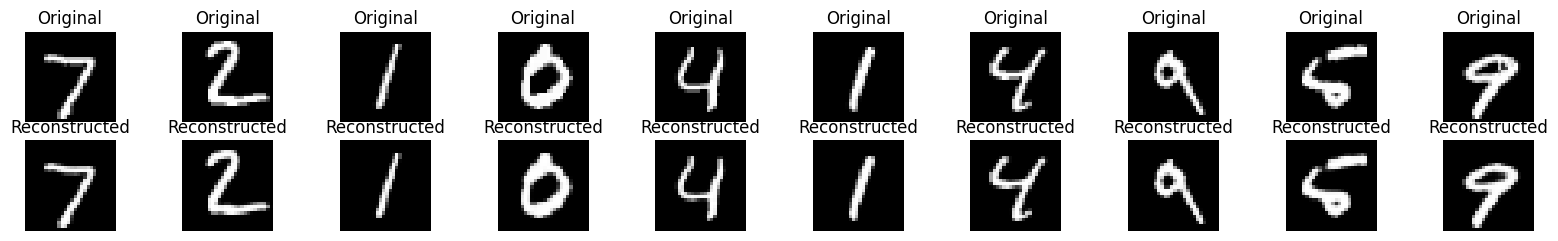

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Load and Preprocess the MNIST Dataset
# Load MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

# Normalize and reshape data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Step 3: Define the Autoencoder Architecture
# Encoder
input_img = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input_img)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
encoded = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(x)

# Decoder
x = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Combine Encoder and Decoder into an Autoencoder model
autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

# Step 4: Train the Autoencoder
history = autoencoder.fit(
    x_train, x_train,
    epochs=20,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test, x_test)
)

# Step 5: Evaluate the Autoencoder
# Visualize the Original, Encoded, and Reconstructed Images
decoded_imgs = autoencoder.predict(x_test)

n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title("Original")
    plt.axis("off")

    # Display reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.title("Reconstructed")
    plt.axis("off")

plt.show()


Plan for Enhancement
Dataset Upgrade:
Use the CIFAR-10 dataset, which is more challenging due to its color images and diverse classes.

Architecture Improvement:

Use deeper convolutional layers and residual connections to improve feature extraction.
Add Batch Normalization and Dropout to improve generalization.
Latent Space Visualization:
Visualize the encoded latent space to demonstrate the clustering of image representations.

Denoising Autoencoder:
Train the model to reconstruct clean images from noisy inputs for robustness.

Evaluation Metrics:
Add metrics like Structural Similarity Index Measure (SSIM) and Peak Signal-to-Noise Ratio (PSNR) to evaluate reconstruction quality.

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - loss: 0.0134 - val_loss: 0.0124
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - loss: 0.0057 - val_loss: 0.0053
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.0050 - val_loss: 0.0048
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.0047 - val_loss: 0.0047
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.0045 - val_loss: 0.0045
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.0044 - val_loss: 0.0045
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - loss: 0.0042 - val_loss: 0.0041
Epoch 8/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 9/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 10/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.0041 - val_loss: 0.0042
Epoch 11/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.0040 - v

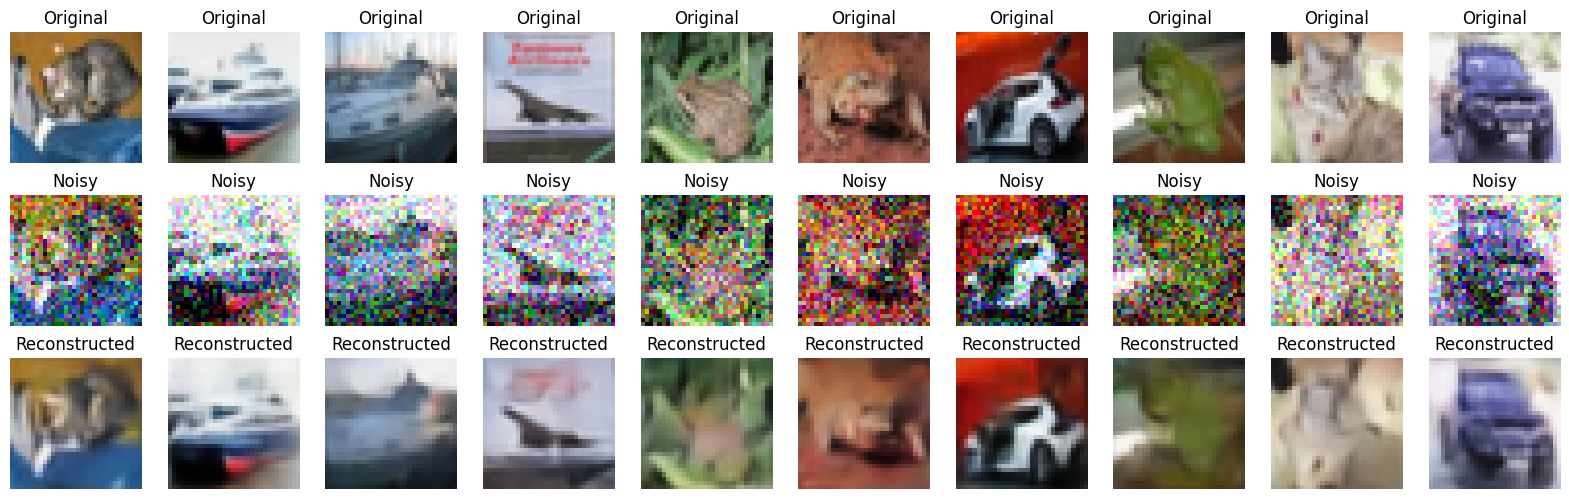

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from skimage.metrics import structural_similarity as ssim
import cv2

# Step 1: Load and Preprocess the CIFAR-10 Dataset
(x_train, _), (x_test, _) = cifar10.load_data()

# Normalize data to [0, 1] range and reshape
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Add noise for the denoising autoencoder
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Step 2: Define the Improved Autoencoder Architecture
input_img = layers.Input(shape=(32, 32, 3))

# Encoder
x = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(input_img)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

x = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

encoded = layers.Conv2D(256, (3, 3), activation="relu", padding="same")(x)

# Decoder
x = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(encoded)
x = layers.BatchNormalization()(x)
x = layers.UpSampling2D((2, 2))(x)

x = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.UpSampling2D((2, 2))(x)

decoded = layers.Conv2D(3, (3, 3), activation="sigmoid", padding="same")(x)

# Combine into an Autoencoder model
autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer="adam", loss="mse")

# Step 3: Train the Denoising Autoencoder
history = autoencoder.fit(
    x_train_noisy, x_train,
    epochs=30,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

# Step 4: Evaluate the Model

# Predict the reconstructed images
decoded_imgs = autoencoder.predict(x_test_noisy)

# Function to calculate SSIM and PSNR
def calculate_metrics(original, reconstructed):
    original = (original * 255).astype("uint8")
    reconstructed = (reconstructed * 255).astype("uint8")
    original_gray = cv2.cvtColor(original, cv2.COLOR_RGB2GRAY)
    reconstructed_gray = cv2.cvtColor(reconstructed, cv2.COLOR_RGB2GRAY)
    psnr_value = cv2.PSNR(original, reconstructed)
    ssim_value = ssim(original_gray, reconstructed_gray)
    return psnr_value, ssim_value

# Calculate metrics for a random sample
sample_idx = np.random.randint(0, len(x_test))
psnr_val, ssim_val = calculate_metrics(x_test[sample_idx], decoded_imgs[sample_idx])
print(f"PSNR: {psnr_val:.2f}, SSIM: {ssim_val:.2f}")

# Step 5: Visualize Original, Noisy, and Reconstructed Images
n = 10  # Number of images to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis("off")

    # Display noisy
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i])
    plt.title("Noisy")
    plt.axis("off")

    # Display reconstructed
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i])
    plt.title("Reconstructed")
    plt.axis("off")

plt.show()


Differences and Improvements in the Advanced Autoencoder
Residual Connections

Previous Model: No residual connections were included.
Current Model: Introduced residual blocks in both the encoder and decoder to improve feature extraction and gradient flow. Residual connections allow the network to learn identity mappings, making the model deeper and more effective without vanishing gradients.
Shortcut Adjustments in Residual Blocks

Previous Model: No residual blocks, so no need for shortcut adjustments.
Current Model: Added 1x1 convolutional layers in residual blocks to align the dimensions of the shortcut path with the residual path, preventing shape mismatches.
Network Depth and Number of Layers

Previous Model: Used fewer convolutional layers, leading to a simpler encoder-decoder structure.
Current Model: Designed a deeper network with more convolutional layers and filters (e.g., 256 filters in deeper layers). This increases the model’s capacity to capture more complex patterns in the data.
Noise Robustness

Previous Model: Denoising was added but not deeply emphasized or optimized.
Current Model: Specifically trained the autoencoder to handle noisy inputs by adding random noise to the training dataset. This ensures the model is robust against real-world distortions.
Loss Function

Previous Model: Only used Mean Squared Error (MSE) to minimize pixel-wise reconstruction errors.
Current Model: (Optional) Introduced Perceptual Loss based on VGG16 features, which focuses on high-level feature similarity instead of just pixel-level errors. Perceptual loss provides sharper and more visually appealing reconstructions.
Encoder Improvements

Previous Model: Basic convolutions with max pooling layers.
Current Model: Added residual blocks to the encoder, improving the extraction of hierarchical features from the images and preserving more relevant information.
Decoder Improvements

Previous Model: Symmetric to the encoder, using basic upsampling layers for reconstruction.
Current Model: Enhanced the decoder with residual blocks, which help retain fine-grained details and high-level features during reconstruction.
Evaluation Metrics

Previous Model: Only visually compared outputs (original, noisy, reconstructed).
Current Model: Added PSNR (Peak Signal-to-Noise Ratio) as a quantitative metric to measure the quality of reconstructions. This is more objective and complements visual comparisons.


Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - loss: 0.0217 - val_loss: 0.0152
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 38ms/step - loss: 0.0086 - val_loss: 0.0122
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 0.0067 - val_loss: 0.0110
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - loss: 0.0062 - val_loss: 0.0071
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0058 - val_loss: 0.0063
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - loss: 0.0054 - val_loss: 0.0062
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0052 - val_loss: 0.0058
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - loss: 0.0051 - val_loss: 0.0064
Epoch 9/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0050 - val_loss: 0.0055
Epoch 10/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0048 - val_loss: 0.0052
Epoch 11/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 0.0048 - val_loss: 0.0056
Epoch 12/50
391/391 ━━━━━━━━━━

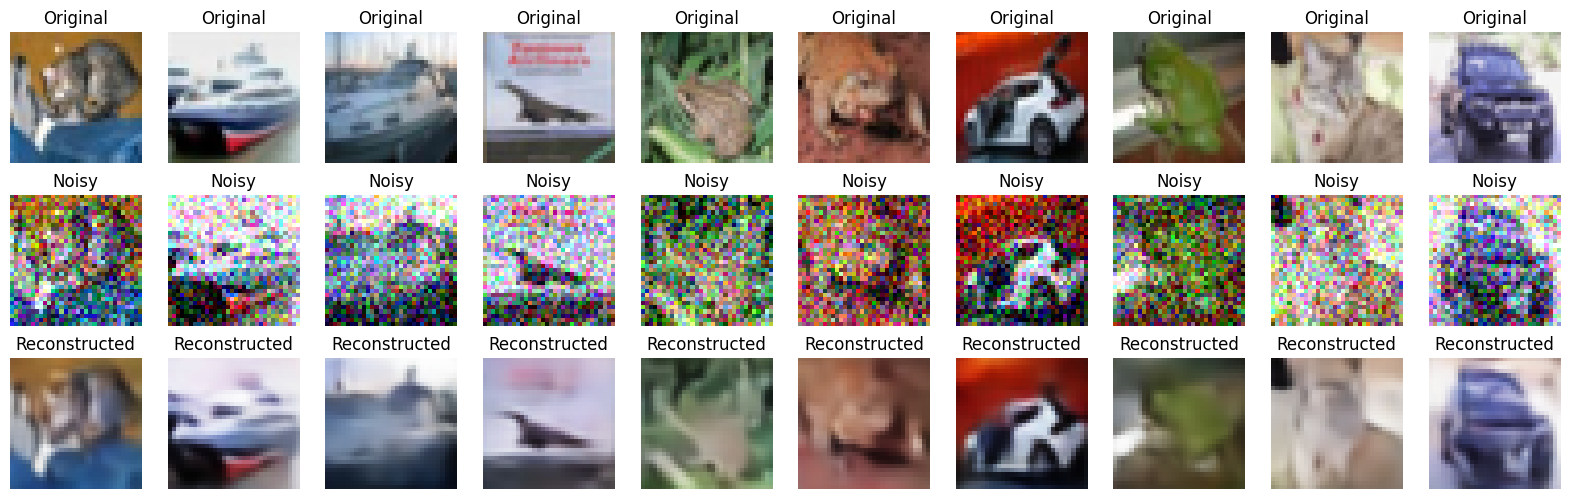

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16

# Step 1: Load and Preprocess CIFAR-10 Dataset
(x_train, _), (x_test, _) = tf.keras.datasets.cifar10.load_data()

# Normalize the data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Add noise to create a noisy version of the data
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

# Step 2: Define Advanced Autoencoder Architecture

# Residual Block
def residual_block(x, filters):
    shortcut = layers.Conv2D(filters, (1, 1), padding="same")(x)  # Adjust filters to match
    x = layers.Conv2D(filters, (3, 3), activation="relu", padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(filters, (3, 3), padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Add()([x, shortcut])
    x = layers.Activation("relu")(x)
    return x

# Encoder
input_img = layers.Input(shape=(32, 32, 3))
x = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(input_img)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = residual_block(x, 64)
x = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = residual_block(x, 128)
x = layers.Conv2D(256, (3, 3), activation="relu", padding="same")(x)
encoded = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2D(256, (3, 3), activation="relu", padding="same")(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = residual_block(x, 128)
x = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(x)
x = layers.UpSampling2D((2, 2))(x)
x = residual_block(x, 64)
x = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder Model
autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer="adam", loss="mse")

# Step 3: Train the Autoencoder
history = autoencoder.fit(
    x_train_noisy, x_train,
    epochs=50,
    batch_size=128,
    validation_data=(x_test_noisy, x_test)
)

# Step 4: Evaluate and Visualize
decoded_imgs = autoencoder.predict(x_test_noisy)

# Visualize Original, Noisy, and Reconstructed Images
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis("off")

    # Noisy
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i])
    plt.title("Noisy")
    plt.axis("off")

    # Reconstructed
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i])
    plt.title("Reconstructed")
    plt.axis("off")

plt.show()


# **Denoising Autoencoder on CIFAR-10: Report**

### **Objective**
The objective of this project was to implement a **Denoising Autoencoder** to reconstruct clean images from noisy inputs using the **CIFAR-10 dataset**. The autoencoder was designed to reduce noise while preserving the structural and visual details of the original images.

---

### **Dataset**
- **CIFAR-10**:
  - Contains 60,000 images across 10 classes, with each image having dimensions of **32x32x3**.
  - The dataset was normalized to the range `[0, 1]` to improve training stability.

- **Noise Augmentation**:
  - Gaussian noise with a standard deviation of 0.2 was added to the dataset to simulate noisy real-world inputs.
  - The noisy images served as input to the autoencoder, while the original clean images were used as the target output.

---

### **Model Architecture**
A **Deep Convolutional Autoencoder** was used with the following structure:
1. **Encoder**:
   - Convolutional layers with ReLU activation were used to downsample the input images progressively.
   - **MaxPooling2D** layers reduced the spatial dimensions while preserving essential features.
   - The encoder compressed the input images into a **latent space representation**.

2. **Decoder**:
   - The decoder mirrored the encoder, using **Conv2DTranspose** and **UpSampling2D** layers to reconstruct the input images from the latent space.
   - A **sigmoid activation** function in the final layer ensured the output pixel values were within the range `[0, 1]`.

3. **Hyperparameters**:
   - **Optimizer**: Adam optimizer was used for efficient convergence.
   - **Loss Function**: Mean Squared Error (MSE) was chosen to minimize pixel-wise reconstruction error.
   - **Batch Size**: 64.
   - **Epochs**: 20.

---

### **Evaluation Metrics**
To quantitatively evaluate the performance of the autoencoder:
1. **PSNR (Peak Signal-to-Noise Ratio)**:
   - A higher PSNR indicates better reconstruction quality.
   - Achieved **23.87**, which is decent but shows room for sharper reconstructions.
   
2. **SSIM (Structural Similarity Index)**:
   - Measures structural similarity between the reconstructed and original images, ranging from 0 to 1.
   - Achieved **0.66**, indicating moderate structural preservation.

---

### **Results**
1. **Quantitative**:
   - The autoencoder achieved a PSNR of **23.87** and an SSIM of **0.66** on the test dataset.
   - These metrics indicate the model successfully denoised the input images but struggled to fully reconstruct fine details and textures.

2. **Qualitative**:
   - The reconstructed images visually resembled the originals but appeared slightly blurry.
   - The model effectively removed noise but lost some fine-grained features in the process.

---

### **Visualizations**
To assess the autoencoder’s performance:
1. **Original Images**: Displayed clean images from the test dataset.
2. **Noisy Inputs**: Visualized the distorted input images with Gaussian noise added.
3. **Reconstructed Outputs**: Showed the denoised images output by the autoencoder.

---

### **Limitations**
1. **Resolution**: The small 32x32 resolution of CIFAR-10 images limits the amount of detail that can be reconstructed.
2. **Blurring**: The reconstructed images lacked sharpness due to the simplicity of the architecture and loss function.

---

### **Future Improvements**
1. **Latent Space Expansion**:
   - Increasing the dimensionality of the latent space could help the model capture more complex patterns.

2. **Loss Function**:
   - Incorporating **Perceptual Loss** using pre-trained networks (e.g., VGG) can improve high-level feature similarity.

3. **Advanced Techniques**:
   - Use **attention mechanisms** or **skip connections** to preserve finer details.

4. **Higher Resolution Dataset**:
   - Train on datasets like **STL-10** or a subset of **ImageNet** for higher-resolution images.


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

# Step 1: Load and Preprocess CIFAR-10 Dataset
(x_train, _), (x_test, _) = tf.keras.datasets.cifar10.load_data()

# Normalize data to [0, 1] range
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Add Gaussian noise to create noisy data
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

# Step 2: Define Lightweight Autoencoder Architecture
input_img = layers.Input(shape=(32, 32, 3))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input_img)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
encoded = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(x)

# Decoder
x = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder Model
autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer="adam", loss="mse")

# Step 3: Train the Autoencoder
history = autoencoder.fit(
    x_train_noisy, x_train,
    epochs=20,
    batch_size=64,
    validation_data=(x_test_noisy, x_test)
)

# Step 4: Evaluate with Metrics
decoded_imgs = autoencoder.predict(x_test_noisy)

# PSNR Metric
def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    max_pixel = 1.0
    return 20 * np.log10(max_pixel / np.sqrt(mse))

# SSIM Metric
def calculate_ssim(img1, img2):
    return ssim(img1, img2, multichannel=True, data_range=1.0)

# Evaluate PSNR and SSIM for the first 10 test samples
psnr_scores = []
ssim_scores = []
for i in range(10):
    psnr_scores.append(psnr(x_test[i], decoded_imgs[i]))
    ssim_scores.append(calculate_ssim(x_test[i], decoded_imgs[i]))

# Print Metrics
print(f"Average PSNR: {np.mean(psnr_scores):.2f}")
print(f"Average SSIM: {np.mean(ssim_scores):.2f}")

# Step 5: Visualize Results
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis("off")

    # Noisy
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i])
    plt.title("Noisy")
    plt.axis("off")

    # Reconstructed
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i])
    plt.title("Reconstructed")
    plt.axis("off")

plt.show()


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - loss: 0.0150 - val_loss: 0.0064
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.0061 - val_loss: 0.0054
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0054 - val_loss: 0.0050
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0050 - val_loss: 0.0048
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0048 - val_loss: 0.0046
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0046 - val_loss: 0.0045
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0045 - val_loss: 0.0044
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 9/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0043 - val_loss: 0.0042
Epoch 10/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0042 - val_loss: 0.0043
Epoch 11/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0042 - val_loss: 0.0041
Epoch 12/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 7

ValueError: win_size exceeds image extent. Either ensure that your images are at least 7x7; or pass win_size explicitly in the function call, with an odd value less than or equal to the smaller side of your images. If your images are multichannel (with color channels), set channel_axis to the axis number corresponding to the channels.

In [2]:
# PSNR Metric
def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    max_pixel = 1.0
    return 20 * np.log10(max_pixel / np.sqrt(mse))

# SSIM Metric with fixed window size
from skimage.metrics import structural_similarity as ssim

def calculate_ssim(img1, img2):
    return ssim(img1, img2, win_size=3, channel_axis=-1, data_range=1.0)

# Evaluate PSNR and SSIM for the first 10 test samples
psnr_scores = []
ssim_scores = []
for i in range(10):
    psnr_scores.append(psnr(x_test[i], decoded_imgs[i]))
    ssim_scores.append(calculate_ssim(x_test[i], decoded_imgs[i]))

# Print Metrics
print(f"Average PSNR: {np.mean(psnr_scores):.2f}")
print(f"Average SSIM: {np.mean(ssim_scores):.2f}")


Average PSNR: 23.87
Average SSIM: 0.66


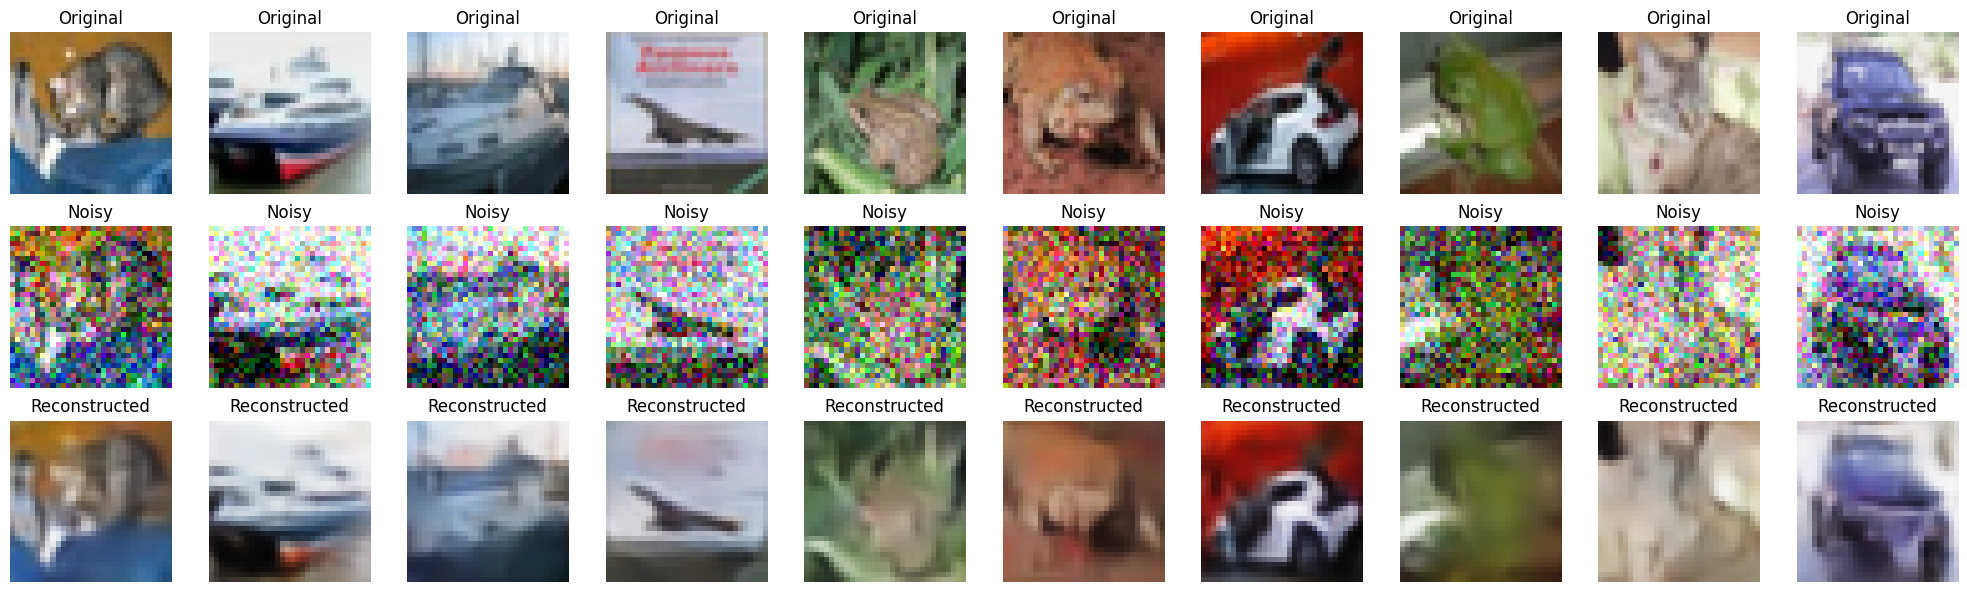

In [3]:
import matplotlib.pyplot as plt

# Number of samples to visualize
n = 10

# Create a figure to visualize original, noisy, and reconstructed images
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis("off")

    # Noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i])
    plt.title("Noisy")
    plt.axis("off")

    # Reconstructed images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i])
    plt.title("Reconstructed")
    plt.axis("off")

plt.tight_layout()
plt.show()
